In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score

sns.set()
%matplotlib inline

endangered_languages = pd.read_csv('../data_sets/endangered_languages_ML.csv')
endangered_languages.head()

,Language,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
0,South Italian,7500000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sicilian,5000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Lombard,3500000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Emilian-Romagnol,2000000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Piedmontese,2000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
endangered_languages[endangered_languages['Language'] == 'Koireng']

,Language,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
172,Koireng,1056.0,4.184796,29.0,57.13,1,545871973314,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
endangered_languages[endangered_languages['Language'] == 'Isirawa']

,Language,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
1523,Isirawa,1800.0,3.831907,52.0,51.58,1,255539945097,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
endangered_languages.sample(15)

,Language,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
1268,Iduh (Viet Nam),5.0,4.099074,42.0,53.12,1,68782973640,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1838,Bardi,30.0,2.184833,1.0,100.00,1,417399409147,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1651,Moroccan Judeo-Arabic (Morocco),5000.0,4.667222,68.0,48.10,1,36727073581,0,0,0,...,0,0,0,0,0,0,0,0,1,0
764,Central Tlapanec,6191.0,4.282278,58.0,49.76,1,435989038918,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1511,Padoe,5000.0,3.831907,52.0,51.58,1,255539945097,0,0,0,...,0,0,0,0,0,0,0,0,0,1
336,Nez Perce,20.0,2.158602,1.0,100.00,1,6991517086206,0,0,0,...,0,0,0,0,0,1,0,0,0,0
633,Cuman,0.0,1.711481,22.0,59.51,1,91585280298,0,0,0,...,0,0,0,0,0,0,0,1,0,0
172,Koireng,1056.0,4.184796,29.0,57.13,1,545871973314,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1054,Carapana (Colombia),60.0,3.910852,61.0,48.90,1,94715051940,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1052,Ocaina (Colombia),126.0,3.910852,61.0,48.90,1,94715051940,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# Labels are the values we want to predict (don't load it as a df, just a series)
y = np.array(endangered_languages['Extinct'])

# Remove the labels from the features
# axis 1 refers to the columns
X = endangered_languages.drop(['Language', 'Extinct'], axis=1)

# Saving feature names for later use
X_names = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [28]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1449, 160) (1449,)
(484, 160) (484,)


In [29]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

In [30]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Speakers             Importance: 0.93
Variable: Critically endangered Importance: 0.05
Variable: Vulnerable           Importance: 0.01
Variable: Fertility Rate Avg   Importance: 0.0
Variable: 2018 Rank            Importance: 0.0
Variable: 2018 Score           Importance: 0.0
Variable: Number of Countries Spoken Importance: 0.0
Variable: GDP Average (Current US $) Importance: 0.0
Variable: The former Yugoslav Republic of Macedonia Importance: 0.0
Variable: Ethiopia             Importance: 0.0
Variable: Costa Rica           Importance: 0.0
Variable: Sudan                Importance: 0.0
Variable: Viet Nam             Importance: 0.0
Variable: Honduras             Importance: 0.0
Variable: Mongolia             Importance: 0.0
Variable: Lao People's Democratic Republic Importance: 0.0
Variable: United Kingdom of Great Britain and Northern Ireland Importance: 0.0
Variable: Mauritania           Importance: 0.0
Variable: French Polynesia (France) Importance: 0.0
Variable: China      

In [21]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=9)


# Extract the two most important features
important_indices = [X_names.index('Speakers'), X_names.index('Critically endangered')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]


# Train the random forest
rf_most_important.fit(train_important, y_train)


# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)


# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: nan %.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


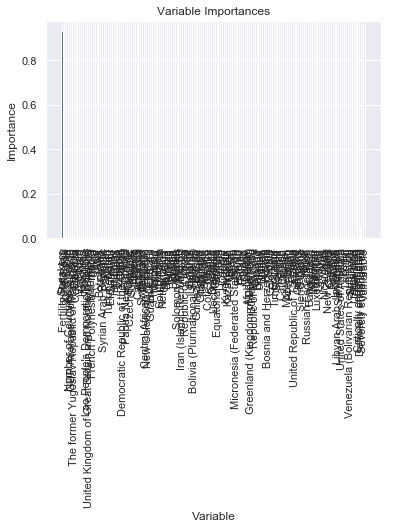

In [23]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X_names, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');